library import

In [7]:
import os #importando biblioteca de organização de arquivos
import joblib #convertendo imagens em valores numéricos .gz
import numpy as np #estruturação de dados
import matplotlib.pyplot as plt #plotagem de gráficos 
import matplotlib.image as mpimg #plotagem de imagens
# from util import meus_uteis, timeProcess
from PIL import Image
from util import meus_uteis, timeProcess
import pandas as pd

Organization of images in folders / 52 brightfield images of the 3T3 lineage are being saved

In [59]:
novas_imagens = '/usr/src/myapp/data/Image_3T3' #diretório

img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(novas_imagens) #listando as figuras salvas no diretório
#len(lista_novas_img) #quantidade de imagens
lista_novas_img

['Figura_10_rot407_campo_claro_3T3.png',
 'Figura_11_rot147_campo_claro_3T3.png',
 'Figura_12_rot134_campo_claro_3T3.png',
 'Figura_13_rot296_campo_claro_3T3.png',
 'Figura_14_rot300_campo_claro_3T3.png',
 'Figura_15_rot74_campo_claro_3T3.png',
 'Figura_16_rot58_campo_claro_3T3.png',
 'Figura_17_rot95_campo_claro_3T3.png',
 'Figura_18_rot103_campo_claro_3T3.png',
 'Figura_19_rot134_campo_claro_3T3.png',
 'Figura_1_rot285_campo_claro_3T3.png',
 'Figura_20_rot40_campo_claro_3T3.png',
 'Figura_21_rot183_campo_claro_3T3.png',
 'Figura_22_rot97_campo_claro_3T3.png',
 'Figura_23_rot76_campo_claro_3T3.png',
 'Figura_24_rot113_campo_claro_3T3.png',
 'Figura_25_rot255_campo_claro_3T3.png',
 'Figura_26_rot518_campo_claro_3T3.png',
 'Figura_27_rot610_campo_claro_3T3.png',
 'Figura_28_rot709_campo_claro_3T3.png',
 'Figura_29_rot452_campo_claro_3T3.png',
 'Figura_2_rot148_campo_claro_3T3.png',
 'Figura_30_rot128_campo_claro_3T3.png',
 'Figura_31_rot221_campo_claro_3T3.png',
 'Figura_32_rot607_campo

In [9]:
# lista_novas_img

View images in 200x200 size

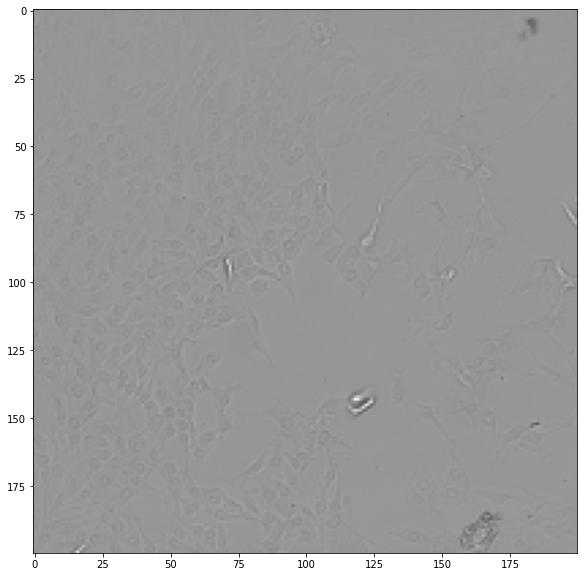

In [10]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

y = label (52)



In [11]:
#Salvando os rótulos da imgem em uma lista
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img] #cortando informações da imagem
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = y_rotulo_imagem
len(y_rotulo_imagem) #verificando o numero de rótulos corresponde o numero de imagens

52

In [ ]:
# y_rotulo_imagem.sort()
# print(y_rotulo_imagem)

In [ ]:
# #dados estatísticos do conjunto de imagens
# df = pd.DataFrame(y_rotulo_imagem)
# df.describe()


Formatting all images that are saved in the directory into an array

In [12]:
lista_imagens_camp_claro = [] #lista vazia onde vai ser armazenado os dados
for file in lista_novas_img:  #laço pra salvar todas as imagens
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test) #abrir a imagem
    img = img.resize(resize_img) #formatando em 200x200
    img = np.asarray(img)[:,:,:3] #formatando em array
    lista_imagens_camp_claro.append(img)  #adicionando cada imagem
np.asarray(lista_imagens_camp_claro).shape #verificando quantas imagens foram salvas em qual tamnho e camadas

(52, 200, 200, 3)

### y = label (104 - doubled)

In [13]:
#dobrando o numero de rótulos - mesmo que a imagem esteja invertida, ela possui mesmo rótulo
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

## Saving inverted images from left to right

In [14]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  """


(104, 200, 200, 3)

In [15]:
# #conferindo a imagem
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*1)])
# plt.show()

## Saving inverted images from bottom to top

Salvando mais 44 imagens invertendo a orientação.

### y = rótulo (132 - dobrou)

In [16]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [17]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  """


(156, 200, 200, 3)

In [18]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*2)])
# plt.show()

### Salvando as imagens invertidas de cima pra baixo

### y = rótulo (284 - dobrou)

In [19]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [20]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)    
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(208, 200, 200, 3)

In [ ]:
# plt.figure(figsize=(10,10))
# plt.imshow(lista_imagens_camp_claro[img_key + (44*3)])
# plt.show()

In [21]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_100_resized_regressao_3T3'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_100_resized_regressao_3T32022-8-2.gz']

In [22]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_100_resized_regressao_3T3'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_100_resized_regressao_3T32022-8-2.gz']

## Cropping 75% of the image/enlarging the image bank

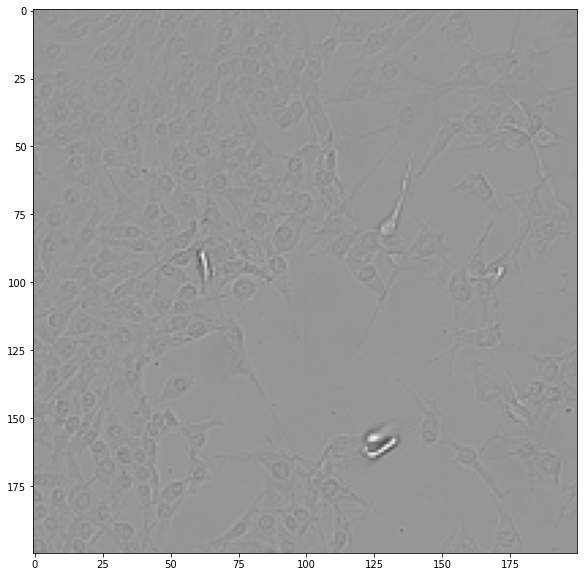

In [23]:
box = (135,135,945,945)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [24]:
from math import ceil

In [25]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n-(n*0.25)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

52

In [26]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(52, 200, 200, 3)

## crop images 75% resized and rotating from left to right

In [27]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

In [28]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(104, 200, 200, 3)

## crop image 75% resized and flipping from bottom to top

In [29]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [30]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  


(156, 200, 200, 3)

## Saving crop 75% resized and flip top bottom image

In [31]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [32]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  import sys


(208, 200, 200, 3)

In [57]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_75_resized_regressao_3T3_'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_75_resized_regressao_3T3_2022-8-2.gz']

In [58]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_75_resized_regressao_3T3_'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_75_resized_regressao_3T3_2022-8-2.gz']

## 50% of the image

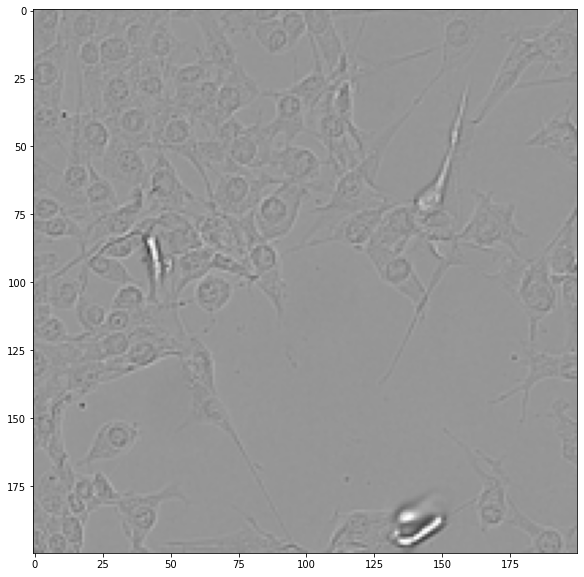

In [35]:
box = (270,270,810,810)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [36]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n/2) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

52

In [37]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(52, 200, 200, 3)

## saving crop 50% resized and turn image left right

In [38]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

In [39]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(104, 200, 200, 3)

## Saving 50% resized crop and flip top bottom image

In [40]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [41]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  


(156, 200, 200, 3)

## Saving crop 50% resized and flip top bottom image

In [42]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [43]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  import sys


(208, 200, 200, 3)

In [44]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_50_resized_regressao_3T3_'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_50_resized_regressao_3T3_2022-8-2.gz']

In [45]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_50_resized_regressao_3T3_'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_50_resized_regressao_3T3_2022-8-2.gz']

## Crop 25% of the image

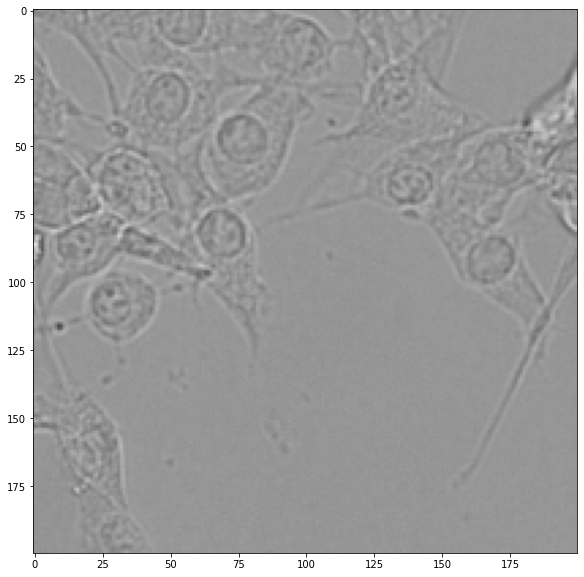

In [46]:
box = (405,405,675,675)

image_test = novas_imagens +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.crop(box=box)
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [47]:
y_rotulo_imagem = [n.split('rot')[1] for n in lista_novas_img]
y_rotulo_imagem = [int(n.split('_')[0]) for n in y_rotulo_imagem]
y_rotulo_imagem = [ceil(n-(n*0.75)) for n in y_rotulo_imagem]
len(y_rotulo_imagem)

52

In [48]:
lista_imagens_camp_claro = []
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file #qual caminho
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

(52, 200, 200, 3)

## Saving crop 25% resized and turn image left right

In [49]:
y_rotulo_soma = y_rotulo_imagem + y_rotulo_imagem
len(y_rotulo_soma)

104

In [50]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  


(104, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [51]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

156

In [52]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  


(156, 200, 200, 3)

## Saving crop 25% resized and flip top bottom image

In [53]:
y_rotulo_soma += y_rotulo_imagem
len(y_rotulo_soma)

208

In [54]:
for file in lista_novas_img:
    image_test = novas_imagens +'/'+ file
    img = Image.open(image_test)
    img = img.crop(box=box)
    img = img.resize(resize_img)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img = np.asarray(img)[:,:,:3]
    lista_imagens_camp_claro.append(img)
np.asarray(lista_imagens_camp_claro).shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  import sys


(208, 200, 200, 3)

In [55]:
#data = timeProcess()[1]
#joblib.dump(np.asarray(lista_imagens_camp_claro), '/usr/src/myapp/results//lista_img_camp_clar_25_resized_regressao_3T3_'+data+'.gz')

['/usr/src/myapp/results//lista_img_camp_clar_25_resized_regressao_3T3_2022-8-2.gz']

In [56]:
#joblib.dump(np.asarray(y_rotulo_soma), '/usr/src/myapp/results//lista_rotulo_camp_clar_25_resized_regressao_3T3_'+data+'.gz')


['/usr/src/myapp/results//lista_rotulo_camp_clar_25_resized_regressao_3T3_2022-8-2.gz']